In [66]:
import pandas as pd  # Para manipulação de dados
import numpy as np  # Para manipulação numérica e operações matemáticas
import matplotlib.pyplot as plt  # Para visualização de gráficos
from datetime import datetime  # Para manipulação de datas
import warnings  # Para lidar com warnings durante o processo
warnings.filterwarnings("ignore")  # Ignorar avisos durante a execução

In [53]:
netflix_df =  pd.read_csv('/content/Netflix Inc. (NFLX) Stock Price 2002-2025.csv')
# Exibir as primeiras linhas do DataFrame
netflix_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Feb 25, 2025",989.4,994.4,955,977.24,977.24,"4,733,000"
1,"Feb 24, 2025","1,008.00","1,015.17",984.48,988.47,988.47,"4,426,200"
2,"Feb 21, 2025","1,029.42","1,032.38",999.39,"1,003.15","1,003.15","3,738,700"
3,"Feb 20, 2025","1,042.00","1,045.00","1,015.59","1,024.54","1,024.54","3,111,800"
4,"Feb 19, 2025","1,035.18","1,045.00","1,024.51","1,043.33","1,043.33","2,600,000"


In [54]:
netflix_df.index
print(type(netflix_df.index))

<class 'pandas.core.indexes.range.RangeIndex'>


In [55]:
netflix_df['Close'].isnull().sum()  # Número de valores nulos
# Exibir as primeiras linhas para verificar
netflix_df[['Close']].head()

,Close
0,977.24
1,988.47
2,"1,003.15"
3,"1,024.54"
4,"1,043.33"


In [56]:
netflix_df = netflix_df.dropna(subset=['Close'])

In [57]:
# Remover caracteres não numéricos, como vírgulas, e garantir que o valor seja numérico
netflix_df['Close'] = netflix_df['Close'].replace({',': ''}, regex=True)

# Converter a coluna 'Close' para tipo float
netflix_df['Close'] = pd.to_numeric(netflix_df['Close'], errors='coerce')

# Verifique novamente se há valores nulos
netflix_df['Close'].isnull().sum()

np.int64(0)

In [58]:
# Substituir valores zero com a média
netflix_df['Close'] = netflix_df['Close'].replace(0, netflix_df['Close'].mean())


In [59]:
# Verificando o tipo de dados da coluna 'Close'
print(type(netflix_df['Close'][0]))  # Tipo do primeiro valor
print(netflix_df['Close'].dtype)  # Tipo de dados da coluna inteira

<class 'numpy.float64'>
float64


In [60]:
netflix_df['Close'].describe()

,Close
count,5727.000000
mean,161.293293
std,213.159529
min,0.370000
25%,4.260000
50%,44.860000
75%,309.315000
max,1058.600000


In [67]:
netflix_df['Date'] = pd.to_datetime(netflix_df['Date'], format='%b %d %Y')

In [68]:
netflix_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2025-02-25,989.40,994.40,955.00,977.24,977.24,4733000
1,2025-02-24,1008.00,1015.17,984.48,988.47,988.47,4426200
2,2025-02-21,1029.42,1032.38,999.39,1003.15,1003.15,3738700
3,2025-02-20,1042.00,1045.00,1015.59,1024.54,1024.54,3111800
4,2025-02-19,1035.18,1045.00,1024.51,1043.33,1043.33,2600000
...,...,...,...,...,...,...,...
5724,2002-05-30,1.11,1.11,1.07,1.07,1.07,10154200
5725,2002-05-29,1.16,1.16,1.09,1.10,1.1,6757800
5726,2002-05-28,1.21,1.23,1.16,1.16,1.16,6609400
5727,2002-05-24,1.21,1.23,1.20,1.21,1.21,11104800


In [62]:
# Removendo espaços extras dos nomes das colunas
netflix_df.columns = netflix_df.columns.str.strip()

# Verificando as colunas novamente
netflix_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [63]:
# Limpando as colunas numéricas (removendo vírgulas) e convertendo para float
netflix_df = netflix_df.replace({',': ''}, regex=True)  # Remover as vírgulas

# Convertendo as colunas que devem ser numéricas para float
netflix_df['Close'] = pd.to_numeric(netflix_df['Close'], errors='coerce')
netflix_df['Volume'] = pd.to_numeric(netflix_df['Volume'], errors='coerce')
netflix_df['Open'] = pd.to_numeric(netflix_df['Open'], errors='coerce')
netflix_df['High'] = pd.to_numeric(netflix_df['High'], errors='coerce')
netflix_df['Low'] = pd.to_numeric(netflix_df['Low'], errors='coerce')

# Verificando se a conversão foi feita corretamente
netflix_df.dtypes


,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,object
Volume,int64


In [64]:
# Removendo vírgulas e outros caracteres não numéricos
netflix_df['Open'] = netflix_df['Open'].replace({',': ''}, regex=True)

# Convertendo para numérico
netflix_df['Open'] = pd.to_numeric(netflix_df['Open'], errors='coerce')

# Verificando se a conversão foi bem-sucedida
netflix_df['Open'].head()

,Open
0,989.40
1,1008.00
2,1029.42
3,1042.00
4,1035.18


In [70]:
correlation_matrix = netflix_df.corr()

# Exibindo a matriz de correlação
print(correlation_matrix)

               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.835472  0.836309  0.834850  0.835636   0.835636   
Open       0.835472  1.000000  0.999875  0.999873  0.999732   0.999732   
High       0.836309  0.999875  1.000000  0.999847  0.999879   0.999879   
Low        0.834850  0.999873  0.999847  1.000000  0.999884   0.999884   
Close      0.835636  0.999732  0.999879  0.999884  1.000000   1.000000   
Adj Close  0.835636  0.999732  0.999879  0.999884  1.000000   1.000000   
Volume    -0.194420 -0.310563 -0.309557 -0.311611 -0.310476  -0.310476   

             Volume  
Date      -0.194420  
Open      -0.310563  
High      -0.309557  
Low       -0.311611  
Close     -0.310476  
Adj Close -0.310476  
Volume     1.000000  


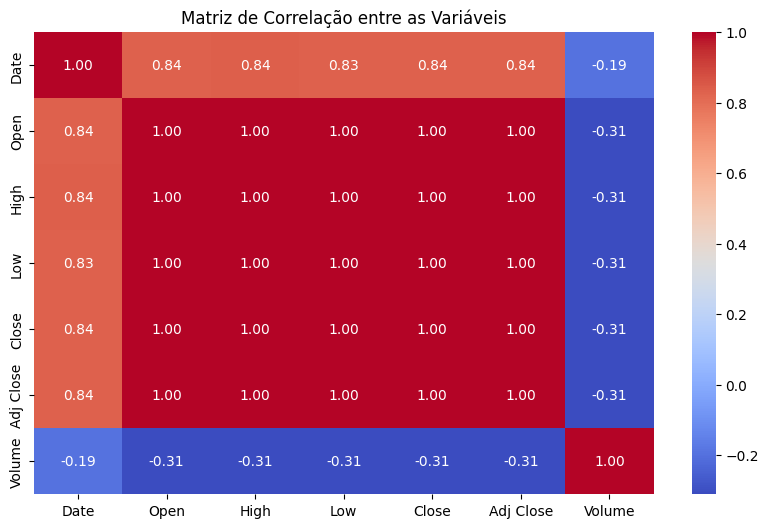

In [72]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre as Variáveis')
plt.show()

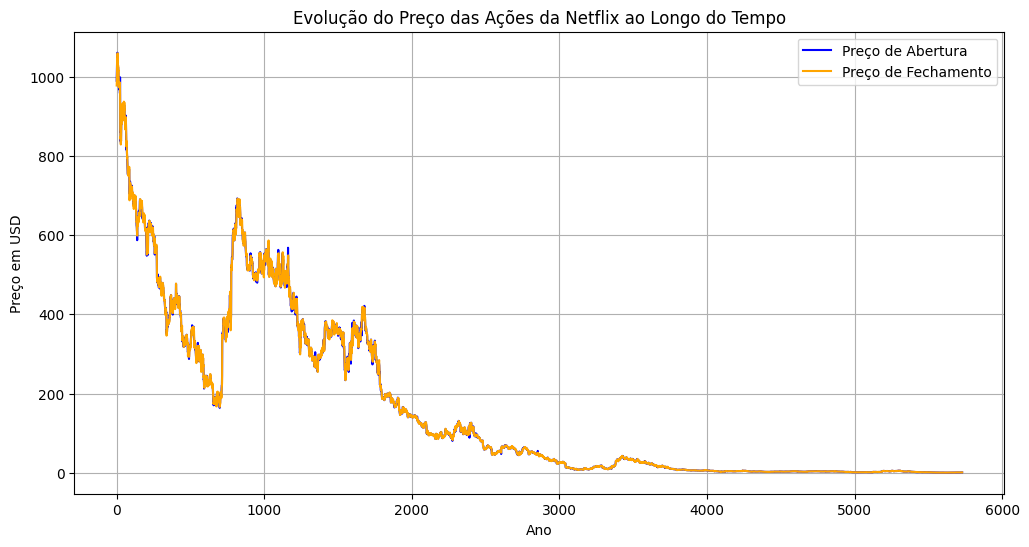

In [73]:
# Plotando a evolução do preço de abertura e de fechamento ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(netflix_df.index, netflix_df['Open'], label='Preço de Abertura', color='blue')
plt.plot(netflix_df.index, netflix_df['Close'], label='Preço de Fechamento', color='orange')
plt.title('Evolução do Preço das Ações da Netflix ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Preço em USD')
plt.legend()
plt.grid(True)
plt.show()


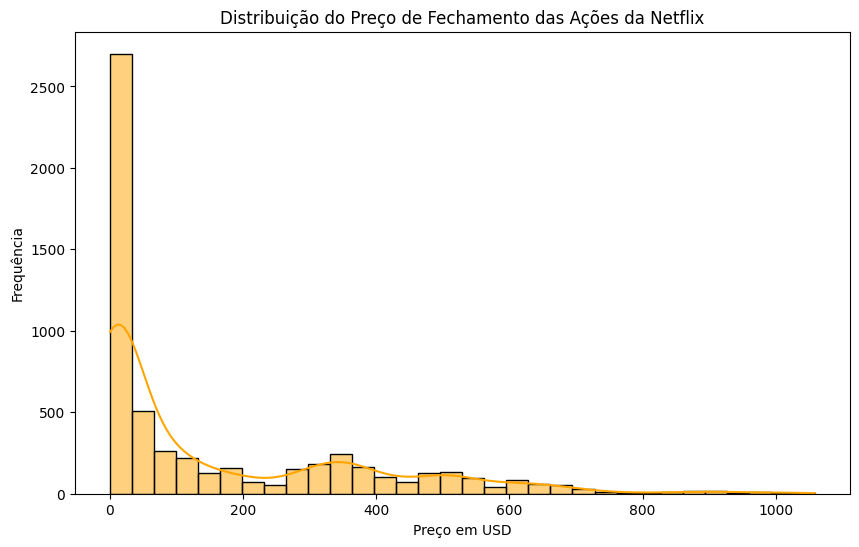

In [74]:
# Verificando a distribuição do preço de fechamento
plt.figure(figsize=(10, 6))
sns.histplot(netflix_df['Close'], kde=True, color='orange')
plt.title('Distribuição do Preço de Fechamento das Ações da Netflix')
plt.xlabel('Preço em USD')
plt.ylabel('Frequência')
plt.show()


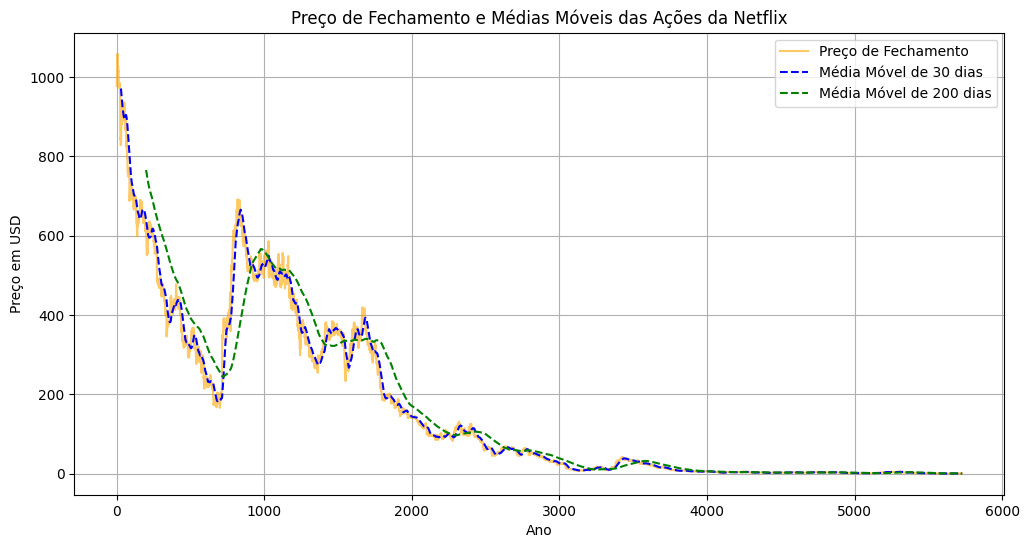

In [75]:
# Calculando a média móvel de 30 dias e 200 dias
netflix_df['SMA_30'] = netflix_df['Close'].rolling(window=30).mean()
netflix_df['SMA_200'] = netflix_df['Close'].rolling(window=200).mean()

# Plotando os preços de fechamento e as médias móveis
plt.figure(figsize=(12, 6))
plt.plot(netflix_df.index, netflix_df['Close'], label='Preço de Fechamento', color='orange', alpha=0.6)
plt.plot(netflix_df.index, netflix_df['SMA_30'], label='Média Móvel de 30 dias', color='blue', linestyle='--')
plt.plot(netflix_df.index, netflix_df['SMA_200'], label='Média Móvel de 200 dias', color='green', linestyle='--')
plt.title('Preço de Fechamento e Médias Móveis das Ações da Netflix')
plt.xlabel('Ano')
plt.ylabel('Preço em USD')
plt.legend()
plt.grid(True)
plt.show()


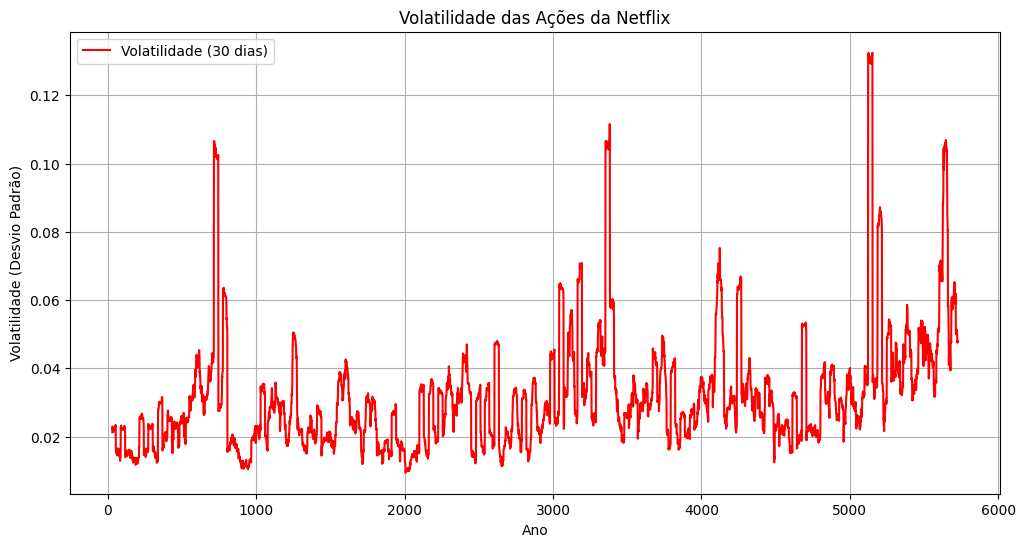

In [76]:
# Calculando a volatilidade diária
netflix_df['Volatilidade'] = netflix_df['Close'].pct_change().rolling(window=30).std()

# Plotando a volatilidade
plt.figure(figsize=(12, 6))
plt.plot(netflix_df.index, netflix_df['Volatilidade'], label='Volatilidade (30 dias)', color='red')
plt.title('Volatilidade das Ações da Netflix')
plt.xlabel('Ano')
plt.ylabel('Volatilidade (Desvio Padrão)')
plt.legend()
plt.grid(True)
plt.show()


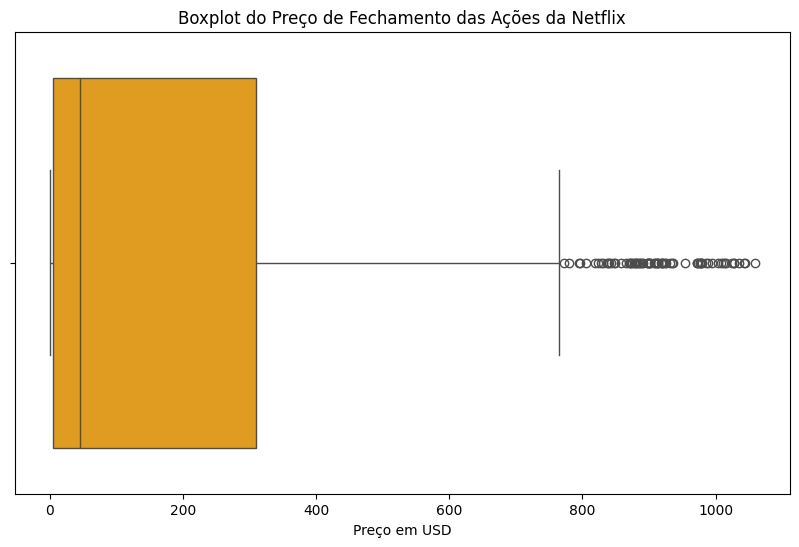

In [77]:
# Boxplot para verificar outliers no preço de fechamento
plt.figure(figsize=(10, 6))
sns.boxplot(x=netflix_df['Close'], color='orange')
plt.title('Boxplot do Preço de Fechamento das Ações da Netflix')
plt.xlabel('Preço em USD')
plt.show()


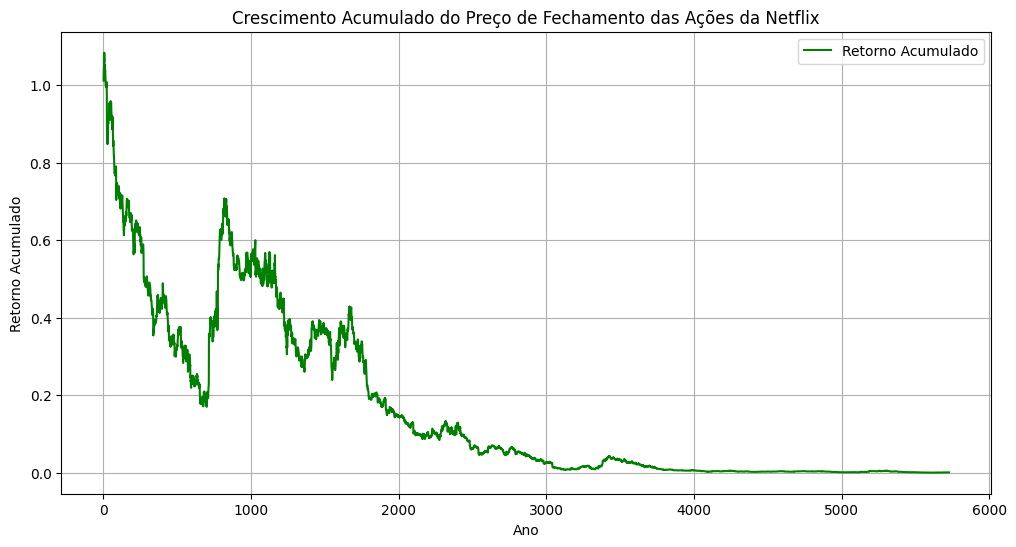

In [78]:
# Calculando o retorno acumulado
netflix_df['Retorno Acumulado'] = (1 + netflix_df['Close'].pct_change()).cumprod()

# Plotando o retorno acumulado
plt.figure(figsize=(12, 6))
plt.plot(netflix_df.index, netflix_df['Retorno Acumulado'], label='Retorno Acumulado', color='green')
plt.title('Crescimento Acumulado do Preço de Fechamento das Ações da Netflix')
plt.xlabel('Ano')
plt.ylabel('Retorno Acumulado')
plt.legend()
plt.grid(True)
plt.show()
